## Sacramento crime January 2006

In [ ]:
pip install folium 

## 1. Importing the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## 2. Reading data 

In [2]:
from pandas import read_csv
crimes = pd.read_csv(r"C:\Users\91970\Downloads\SacramentocrimeJanuary2006.csv")

## 3. Source location

In [3]:
#Source Location - List of links provided in blackboard. Imported it as Csv https://support.spatialkey.com/spatialkey-sample-csv-data/

## 4. Exploratory Data Analysis

### 4.1 General Information about Data

In [4]:
crimes.head()

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1/1/06 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1/1/06 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,1/1/06 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,1/1/06 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,1/1/06 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613


In [5]:
crimes.shape

(7584, 9)

In [6]:
crimes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cdatetime      7584 non-null   object 
 1   address        7584 non-null   object 
 2   district       7584 non-null   int64  
 3   beat           7584 non-null   object 
 4   grid           7584 non-null   int64  
 5   crimedescr     7584 non-null   object 
 6   ucr_ncic_code  7584 non-null   int64  
 7   latitude       7584 non-null   float64
 8   longitude      7584 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 533.4+ KB


In [7]:
crimes.describe() 

,district,grid,ucr_ncic_code,latitude,longitude
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,3.574631,916.250791,4275.068829,38.559809,-121.463832
std,1.642512,407.436310,2171.593193,0.056101,0.034621
min,1.000000,102.000000,909.000000,38.437999,-121.555832
25%,2.000000,567.000000,2309.000000,38.518476,-121.489543
50%,3.000000,899.000000,3532.000000,38.559523,-121.465459
75%,5.000000,1264.000000,7000.000000,38.610361,-121.435947
max,6.000000,1661.000000,8102.000000,38.683789,-121.365238


### 4.2 Checking for null values

In [8]:
missing_values = crimes.isnull().sum()
missing_values

cdatetime        0
address          0
district         0
beat             0
grid             0
crimedescr       0
ucr_ncic_code    0
latitude         0
longitude        0
dtype: int64

<ul>
    <li>From the above cell we can identify that there are no NULL Values in our Dataset</li> 
    <li>We have total 7584 Rows and 9 columns</li> 
</ul>

## 5. Visaulization

### 5.1 Crimes occurring in a month

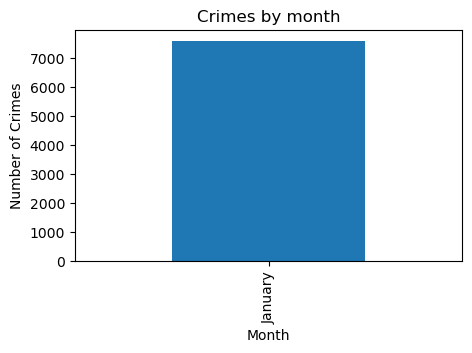

In [9]:
plt.figure(figsize = (5,3))

crimes['cdatetime'] = pd.to_datetime(crimes['cdatetime'])  # Convert to DateTime-like object

#Creating a new column for month name
crimes['Month_Name'] = crimes['cdatetime'].dt.month_name()
# Group by month name and get the count of crimes
day_name_counts = crimes['Month_Name'].value_counts()

# Plot the data
day_name_counts.plot(kind='bar')
plt.title('Crimes by month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

### 5.2 Weekly analysis

Tuesday      1304
Monday       1112
Wednesday    1112
Friday       1058
Thursday     1053
Sunday       1032
Saturday      913
Name: Day_Name, dtype: int64


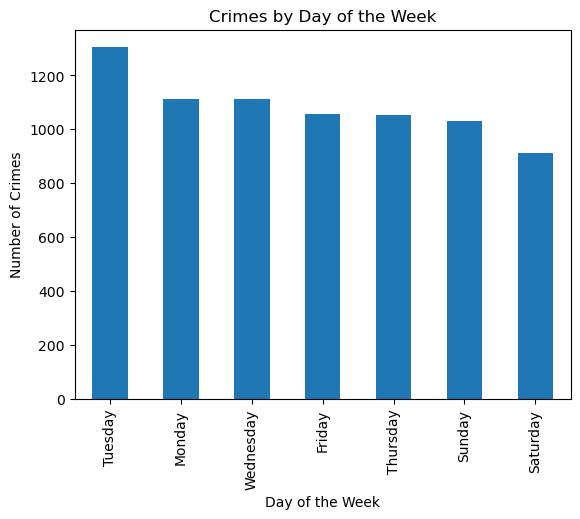

In [10]:
# Create a new column 'Day_Name' containing day names
crimes['Day_Name'] = crimes['cdatetime'].dt.day_name()
# Group by day name and get the count of crimes
day_name_counts = crimes['Day_Name'].value_counts()
print(day_name_counts)
# Plot the data
day_name_counts.plot(kind='bar')
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

### 5.3 Hourly crime analysis

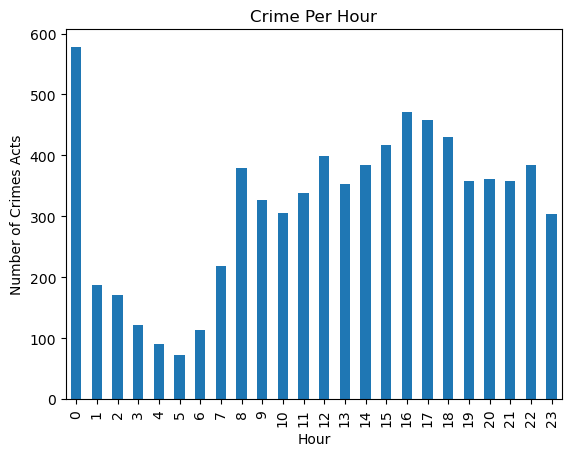

In [11]:
# Set the 'Date' column as the index
crimes.set_index(crimes['cdatetime'], inplace=True)

# Group by hour and get the count of crimes
hourly_counts = crimes.index.hour.value_counts().sort_index()
# Plot the data
hourly_counts.plot(kind='bar')
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

### 5.4 Top 3 areas where mostly crimes are committed

In [12]:
location_counts = crimes.groupby(['latitude', 'longitude']).size().reset_index(name='crime_count')
top_locations = location_counts.sort_values(by='crime_count', ascending=False)
top_3_locations = top_locations.head(3)
# Convert the DataFrame to a key-value dictionary
latitude_dict = {'latitude': list(top_3_locations['latitude'])}
longitude_dict = {'longitude': list(top_3_locations['longitude'])}
crime_count_dict = {'crime_count': list(top_3_locations['crime_count'])}
# Create a base map
m = folium.Map(location=[top_3_locations['latitude'].mean(), top_3_locations['longitude'].mean()], zoom_start=10)

# Add markers for the top 3 locations
for index, row in top_3_locations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Crime Count: {row['crime_count']}",
    ).add_to(m)
# Display the map
m

### 5.5 What are the most common crimes that are committed.

10851(A)VC TAKE VEH W/O OWNER    653
TOWED/STORED VEH-14602.6         463
459 PC  BURGLARY VEHICLE         462
Name: crimedescr, dtype: int64


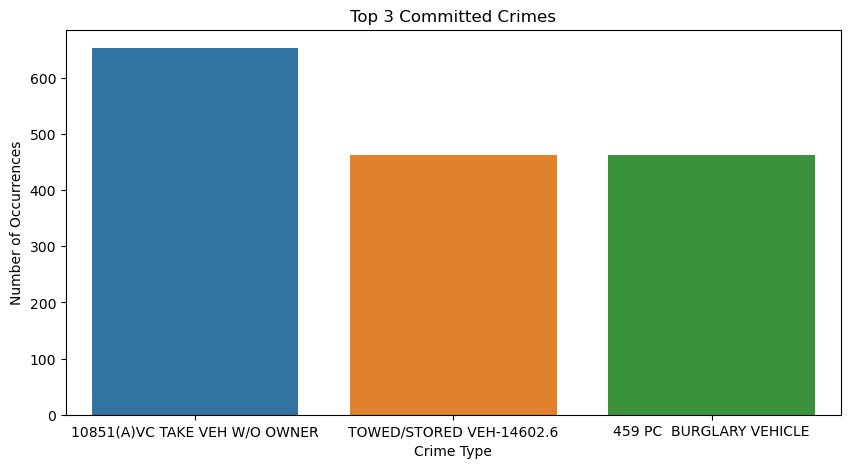

In [13]:
crime_counts = crimes['crimedescr'].value_counts() #counting the occurences of crimedescr 
top_3_crimes = crime_counts.head(3)
print(top_3_crimes)
#plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=top_3_crimes.index, y=top_3_crimes.values)
plt.title('Top 3 Committed Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.show()

### 5.6 District division of crimes which are committed

3    1575
2    1462
6    1359
4    1161
5    1159
1     868
Name: district, dtype: int64


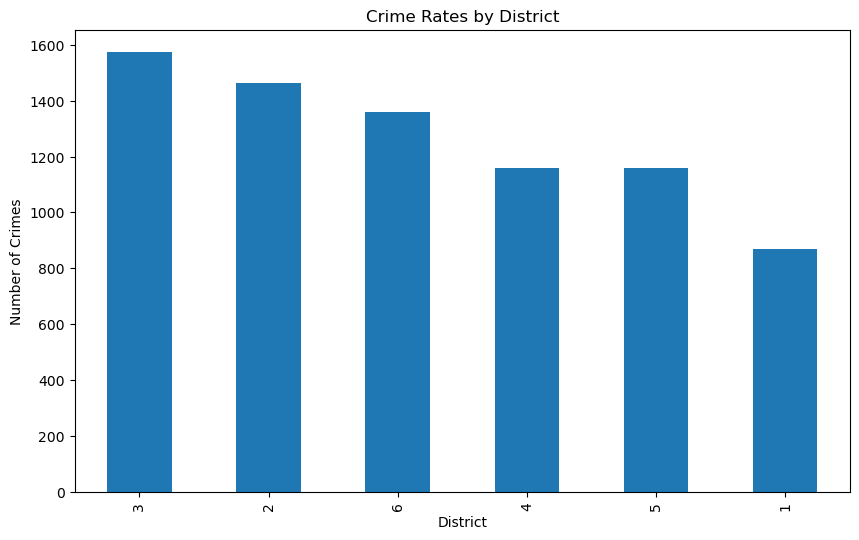

In [14]:
district_crime_counts = crimes['district'].value_counts()
print(district_crime_counts)
# Sort the districts by crime counts in descending order (highest to lowest)
district_crime_counts = district_crime_counts.sort_values(ascending=False)

# Create a bar chart to visualize the districts with the highest and lowest crime rates
plt.figure(figsize=(10, 6))
district_crime_counts.plot(kind='bar')
plt.title('Crime Rates by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.show()